In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [157]:
#Step 1: Load the dataset
dt = pd.read_csv('/content/diabetes.csv')

# Quick data inspection
print(dt.head())
print(dt.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

Data Preproccessing

In [158]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#check for missing values
# Replace 0 with NaN for consistent missing treatment
data_with_nan = dt.replace(0, np.nan)

missing_count = (dt.isnull() | (dt == 0)).sum()

#print("Zeros only:\n", (data == 0).sum())
print("Missing including 0s:\n", missing_count)


Missing including 0s:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [171]:
# Calculate outliers using the IQR method for each predictor
outlier_info = []

for predictor in predictors:
    Q1 = dt[predictor].quantile(0.25)  # First quartile (25th percentile)
    Q3 = dt[predictor].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

# Identify outliers
    outliers = dt[(dt[predictor] < lower_bound) | (dt[predictor] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_info.append({
        'Predictor': predictor,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    })

# Display the outlier analysis results without external modules
print("Outlier Analysis Results:")
print(outlier_df)

Outlier Analysis Results:
                  Predictor  Lower Bound  Upper Bound  Outlier Count
0               Pregnancies       -6.500       13.500              4
1                   Glucose       37.125      202.125              5
2             BloodPressure       35.000      107.000             45
3             SkinThickness      -48.000       80.000              1
4                   Insulin     -190.875      318.125             34
5                       BMI       13.350       50.550             19
6  DiabetesPedigreeFunction       -0.330        1.200             29
7                       Age       -1.500       66.500              9


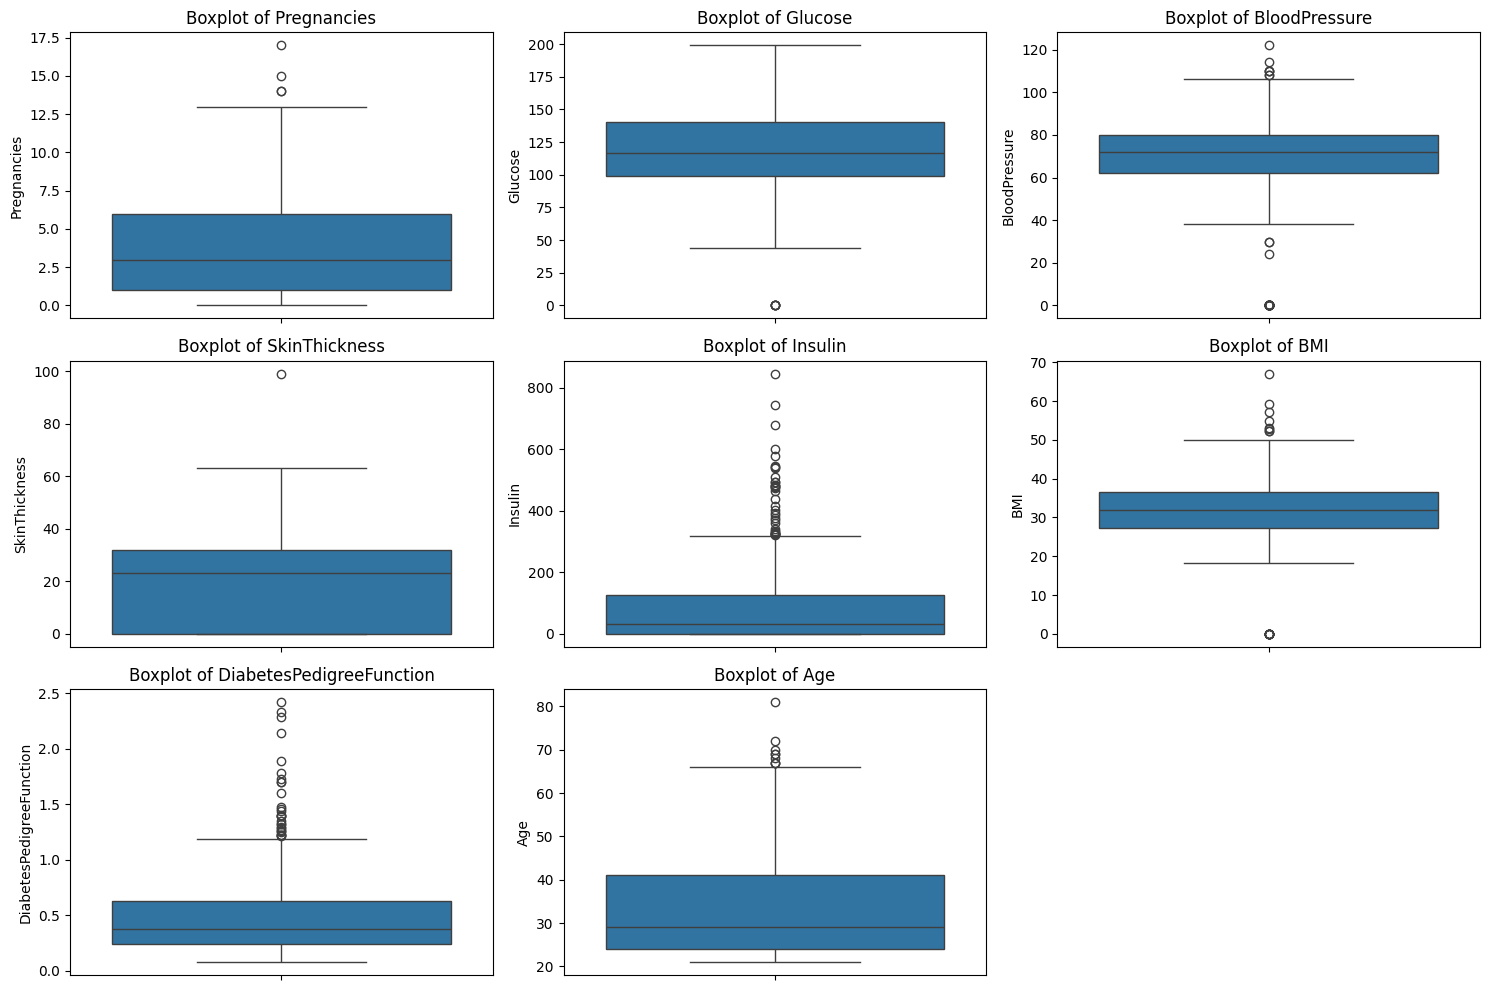

In [152]:
# check outliers
# Generate boxplots for each predictor
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=dt[predictor])
    plt.title(f'Boxplot of {predictor}')
    plt.tight_layout()

plt.show()

Data Cleaning


In [170]:
# Filter out rows where cruical features for diabetes predictions contains 0 or null values
cleaned_missing = dt[(dt['Glucose'] != 0) & (dt['SkinThickness'] != 0) & (dt['Age'] != 0)
                & (dt['Insulin'] != 0) & (dt['BMI'] != 0) & (dt['BloodPressure'] != 0)]

# Display the cleaned dataset's dimensions and a preview
print("Original dataset dimensions:", dt.shape)
print("Cleaned dataset dimensions after removing missing values:", cleaned_missing.shape)


# Clean the data by removing outliers for each predictor
for predictor in predictors:
    Q1 = cleaned_missing[predictor].quantile(0.25)  # First quartile
    Q3 = cleaned_missing[predictor].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

# Remove outliers from the dataset for the current predictor
data = cleaned_missing[
    (cleaned_missing[predictor] >= lower_bound) & (cleaned_missing[predictor] <= upper_bound)
]

# Display the cleaned dataset's dimensions and a preview
print("Cleaned dataset dimensions after removing outliers:", data.shape)
print("Preview of cleaned dataset:")
# print(data_cleaned.head())
print(data)


Original dataset dimensions: (768, 9)
Cleaned dataset dimensions after removing missing values: (392, 9)
Cleaned dataset dimensions after removing outliers: (379, 9)
Preview of cleaned dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
14             5      166             72             19      175  25.8   
..           ...      ...            ...            ...      ...   ...   
751            1      121             78             39       74  39.0   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  

In [163]:
# Define the features and target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Scale the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

<ipython-input-163-35639062ef6c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = scaler.fit_transform(data[features])


In [164]:
#Step 2: Define the Standard Models using C++
# Model 1: Bayesian Linear Regression
#Create a .Stan file and upload here.
#Model 2: Bayesian Non-Linear Regression
#Create a .Stan file and upload here.

In [15]:
pip install cmdstanpy

In [19]:
from cmdstanpy import install_cmdstan
install_cmdstan()

CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.36.0
Download successful, file: /tmp/tmpbjm5uteg
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.36.0
Building version cmdstan-2.36.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.36.0
Test model compilation


True

In [20]:
from cmdstanpy import CmdStanModel

In [165]:
# Step 3: Fitting the Models
# Identify column indices for Age, BMI, and other features
column_index_of_age = features.index('Age') + 1  # Stan uses 1-based indexing
column_index_of_bmi = features.index('BMI') + 1
column_index_of_ins = features.index('Insulin') + 1
column_index_of_blo = features.index('BloodPressure') + 1
column_index_of_pre = features.index('Pregnancies') + 1
column_index_of_ski = features.index('SkinThickness') + 1
column_index_of_dia = features.index('DiabetesPedigreeFunction') + 1
column_index_of_glu = features.index('Glucose') + 1

# Load and fit the linear model
linear_model = CmdStanModel(stan_file='linear_regression1.stan')
linear_fit = linear_model.sample(data={'N': len(data),
                                       'K': len(features),
                                       'X': data[features].values,
                                       'y': data[target].values})


# Load and fit the nonlinear model
nonlinear_model = CmdStanModel(stan_file='nonlinear_regression1.stan')
nonlinear_fit = nonlinear_model.sample(data={
    'N': len(data),
    'K': len(features),
    'X': data[features].values,
    'y': data[target].values,
    'column_index_of_age': column_index_of_age,
    'column_index_of_bmi': column_index_of_bmi,
    'column_index_of_ins': column_index_of_ins,
    'column_index_of_blo': column_index_of_blo,
    'column_index_of_pre': column_index_of_pre,
    'column_index_of_ski': column_index_of_ski,
    'column_index_of_dia': column_index_of_dia,
    'column_index_of_glu': column_index_of_glu
})

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/linear_regression1 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yvx69__/bs1q29iw.json
21:28:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/linear_regression1', 'id=1', 'random', 'seed=21730', 'data', 'file=/tmp/tmp8yvx69__/bs1q29iw.json', 'output', 'file=/tmp/tmp8yvx69__/linear_regression1fapzhvg3/linear_regression1-20250126212803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/linear_regression1', 'id=2', 'random', 'seed=21730', 'data', 'file=/tmp/tmp8yvx69__/bs1q29iw.json', 'output', 'file=/tmp/tmp8yvx69__/linear_regression1fapzhvg3/linear_regression1-20250126212803_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/linear_regression1', 'id=3', 'random', 'seed=21730', 'data', 'file=/tmp/tmp8yvx69__/bs1q29iw.json', 'output', 'file=/tmp/tmp8yvx69__/linear_regression1

21:28:06 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/linear_regression1', 'id=1', 'random', 'seed=21730', 'data', 'file=/tmp/tmp8yvx69__/bs1q29iw.json', 'output', 'file=/tmp/tmp8yvx69__/linear_regression1fapzhvg3/linear_regression1-20250126212803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8yvx69__/linear_regression1fapzhvg3/linear_regression1-20250126212803_1.csv
 console_msgs (if any):
	/tmp/tmp8yvx69__/linear_regression1fapzhvg3/linear_regression1-20250126212803_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Defa

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/nonlinear_regression1 info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yvx69__/rmdcaovs.json
21:28:06 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/nonlinear_regression1', 'id=1', 'random', 'seed=44690', 'data', 'file=/tmp/tmp8yvx69__/rmdcaovs.json', 'output', 'file=/tmp/tmp8yvx69__/nonlinear_regression1sj7ma6ao/nonlinear_regression1-20250126212806_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/nonlinear_regression1', 'id=2', 'random', 'seed=44690', 'data', 'file=/tmp/tmp8yvx69__/rmdcaovs.json', 'output', 'file=/tmp/tmp8yvx69__/nonlinear_regression1sj7ma6ao/nonlinear_regression1-20250126212806_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/nonlinear_regression1', 'id=3', 'random', 'seed=44690', 'data', 'file=/tmp/tmp8yvx69__/rmdcaovs.json', 'output', 'file=/tmp/tmp8yvx69

21:28:18 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/nonlinear_regression1', 'id=1', 'random', 'seed=44690', 'data', 'file=/tmp/tmp8yvx69__/rmdcaovs.json', 'output', 'file=/tmp/tmp8yvx69__/nonlinear_regression1sj7ma6ao/nonlinear_regression1-20250126212806_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8yvx69__/nonlinear_regression1sj7ma6ao/nonlinear_regression1-20250126212806_1.csv
 console_msgs (if any):
	/tmp/tmp8yvx69__/nonlinear_regression1sj7ma6ao/nonlinear_regression1-20250126212806_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
   

<Figure size 1400x800 with 0 Axes>

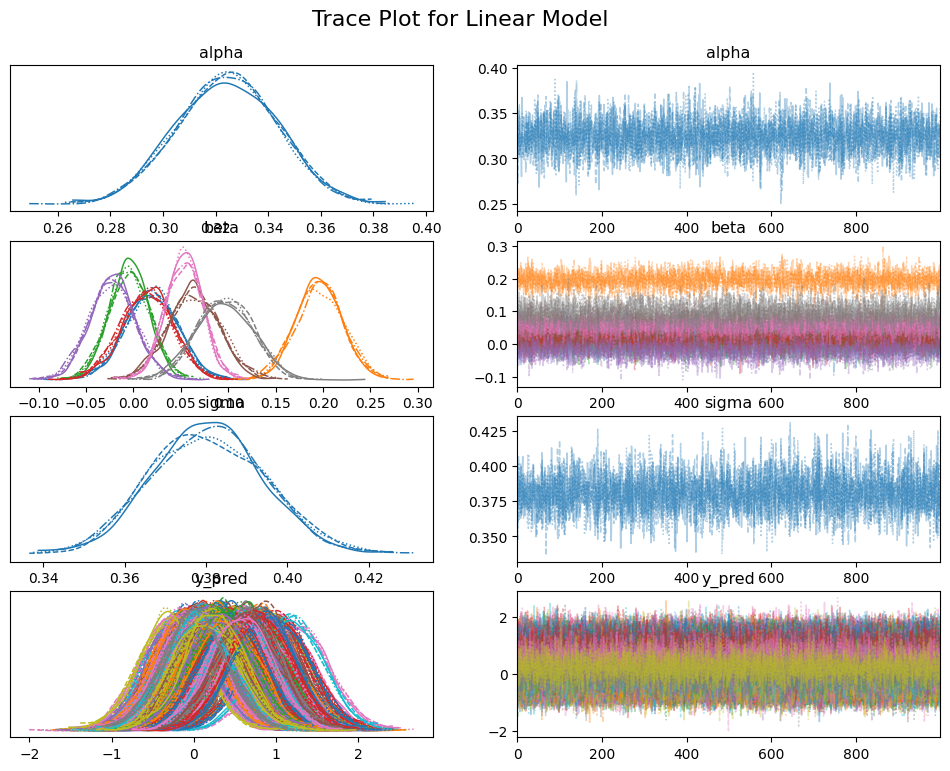

In [203]:
import arviz as az

# Trace plot for the linear model
plt.figure(figsize=(14, 8))  # Set figure size
az.plot_trace(linear_fit)
plt.subplots_adjust(top=.95)  # Adjust space to fit title
plt.suptitle('Trace Plot for Linear Model', fontsize=16, y=1.02)  # Set title with position adjustment
plt.show()  # Display the plot


<Figure size 1400x600 with 0 Axes>

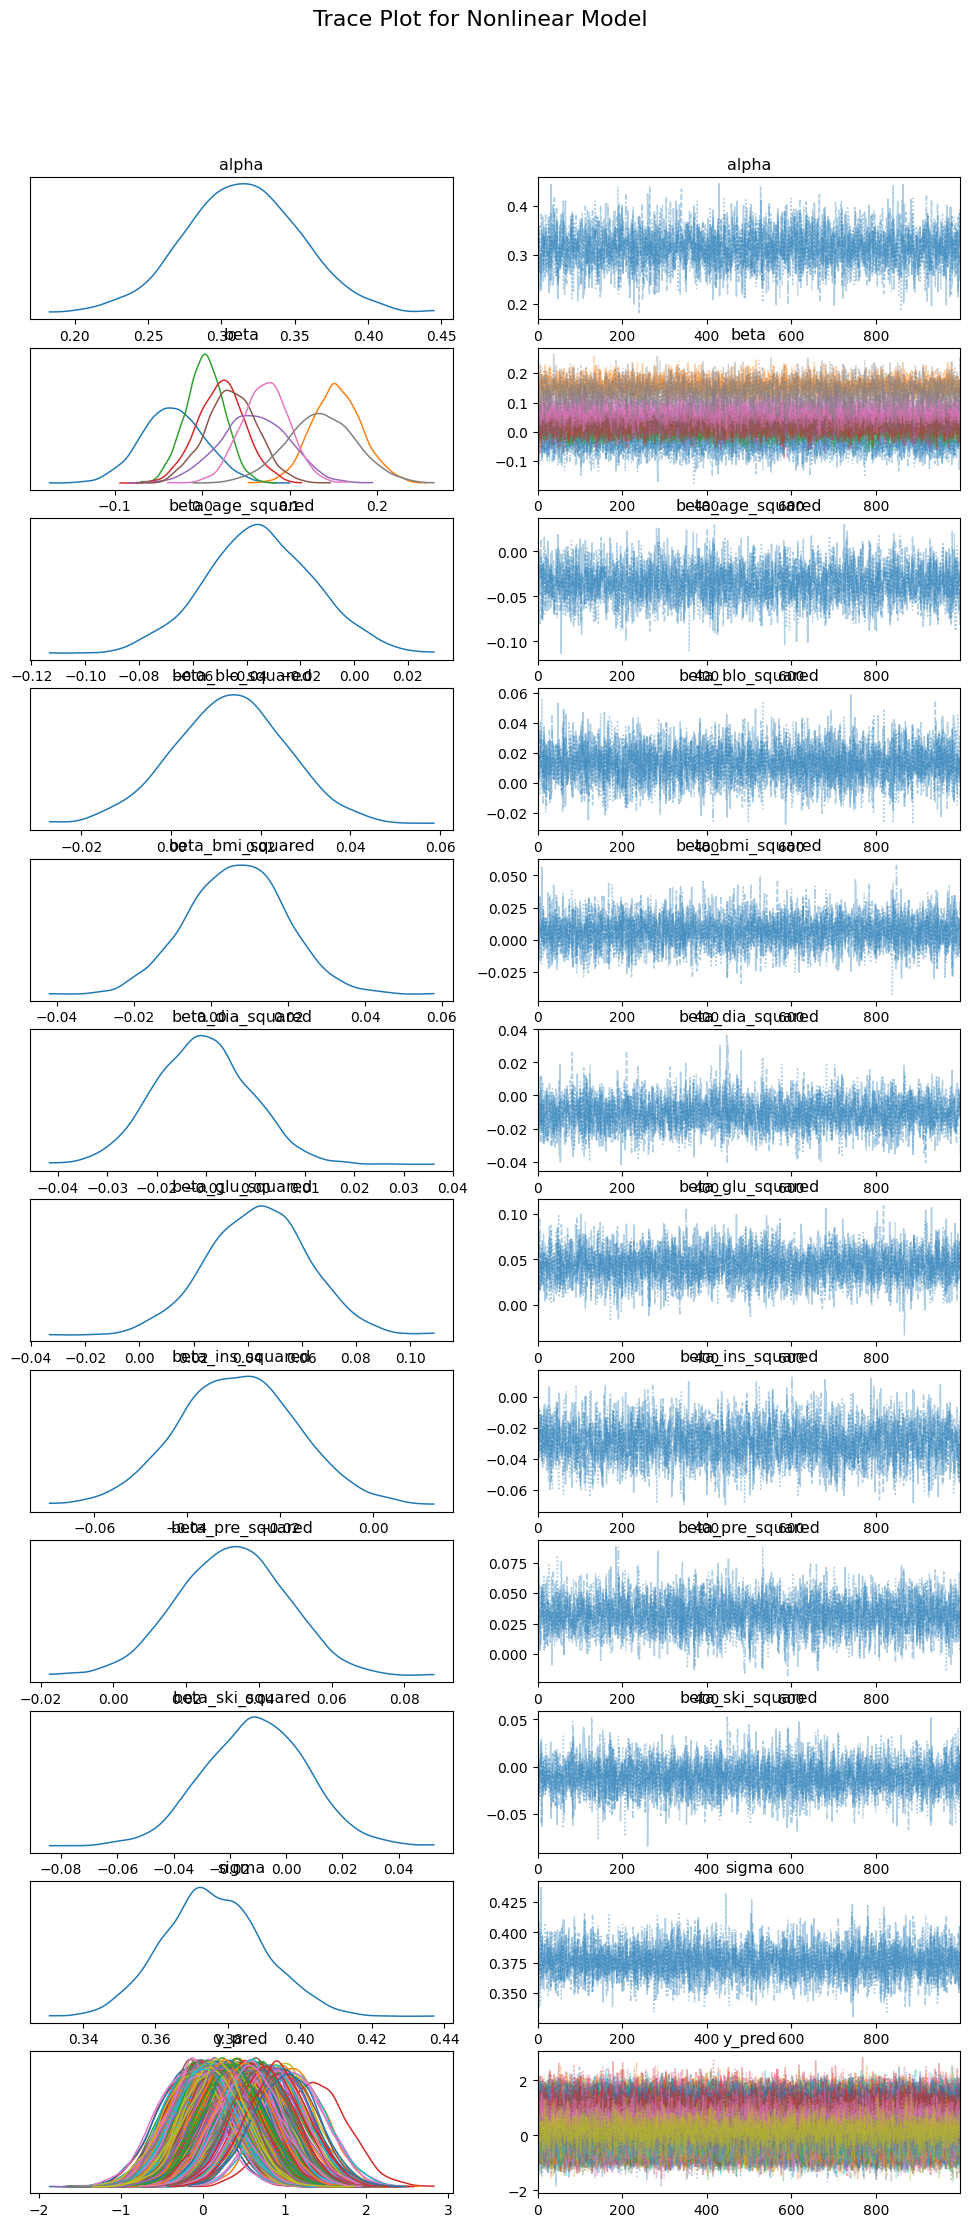

In [209]:
# # Trace plot for the nonlinear model
plt.figure(figsize=(14, 6))  # Wider figure for horizontal alignment
az.plot_trace(nonlinear_fit, combined=True, compact=True)
plt.subplots_adjust(top=0.95)  # Adjust space to fit title
plt.suptitle('Trace Plot for Nonlinear Model', fontsize=16, y=1.02)
plt.show()


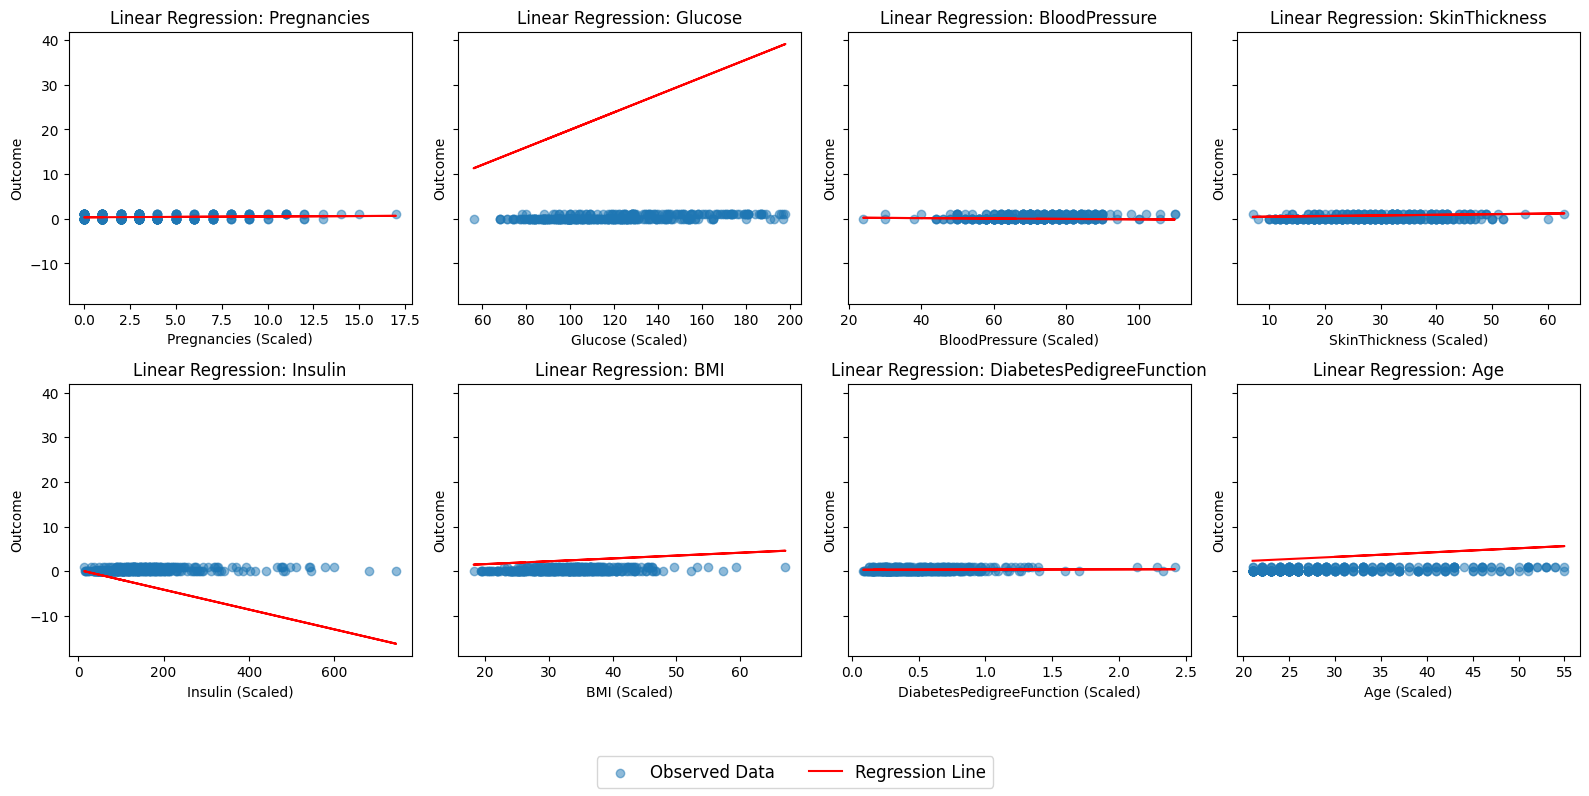

In [194]:
# Extract posterior samples
posterior_samples = linear_fit.draws_pd()

# Compute posterior mean values for parameters
alpha_mean = posterior_samples['alpha'].mean()  # Intercept mean
beta_means = posterior_samples[[f'beta[{i}]' for i in range(1, len(features) + 1)]].mean().values  # Slope means

# Define the predictors to visualize
predictors = features  # Assuming `features` contains all predictor names

# Create a grid for subplots
num_predictors = len(predictors)
cols = 4  # Number of columns
rows = (num_predictors + cols - 1) // cols  # Number of rows needed

# Create the figure
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), sharey=True)
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop through each predictor and plot
for i, predictor in enumerate(predictors):
    ax = axes[i]
    x = data[predictor]  # Predictor values
    y_pred = alpha_mean + beta_means[features.index(predictor)] * x  # Linear regression formula

    # Scatter plot and regression line
    ax.scatter(data[predictor], data[target], alpha=0.5, label="Observed Data")
    ax.plot(x, y_pred, color='red', label="Regression Line")
    ax.set_xlabel(f"{predictor} (Scaled)")
    ax.set_ylabel("Outcome")
    ax.set_title(f"Linear Regression: {predictor}")

# Remove unused subplots if the number of predictors doesn't fill the grid
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend below the entire figure
fig.legend(
    labels=["Observed Data", "Regression Line"],
    loc="lower center",  # Place legend below the plots
    frameon=True,
    fontsize=12,
    ncol=2  # Arrange legend items horizontally
)

# Adjust layout to leave space for the legend
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space below the plots
plt.show()


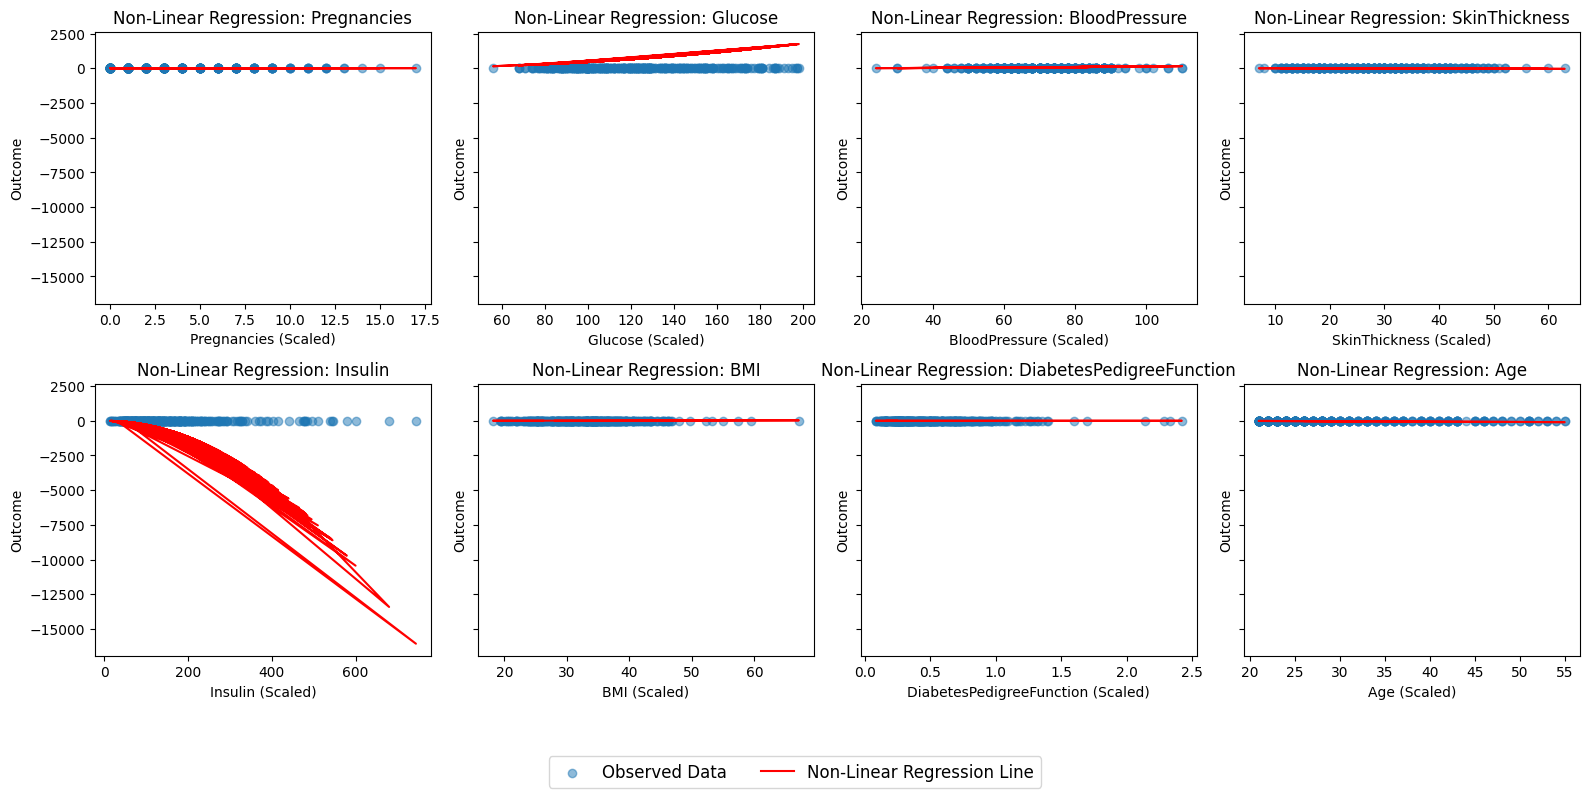

In [173]:
# Extract posterior samples
posterior_samples = nonlinear_fit.draws_pd()

# Compute posterior mean values for parameters
alpha_mean = posterior_samples['alpha'].mean()  # Intercept mean
beta_means = posterior_samples[[f'beta[{i}]' for i in range(1, len(features) + 1)]].mean().values  # Linear coefficients
beta_squared_means = {
    'Age': posterior_samples['beta_age_squared'].mean(),
    'BMI': posterior_samples['beta_bmi_squared'].mean(),
    'Insulin': posterior_samples['beta_ins_squared'].mean(),
    'BloodPressure': posterior_samples['beta_blo_squared'].mean(),
    'Pregnancies': posterior_samples['beta_pre_squared'].mean(),
    'SkinThickness': posterior_samples['beta_ski_squared'].mean(),
    'DiabetesPedigreeFunction': posterior_samples['beta_dia_squared'].mean(),
    'Glucose': posterior_samples['beta_glu_squared'].mean()
}

# Define the predictors to visualize
predictors = features  # Assuming `features` contains all predictor names

# Create a grid for subplots
num_predictors = len(predictors)
cols = 4  # Number of columns
rows = (num_predictors + cols - 1) // cols  # Number of rows needed

# Create the figure
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), sharey=True)
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop through each predictor and plot
for i, predictor in enumerate(predictors):
    ax = axes[i]
    x = data[predictor]  # Predictor values
    x_squared = x ** 2
    y_pred = (
        alpha_mean +
        beta_means[features.index(predictor)] * x +
        beta_squared_means[predictor] * x_squared  # Add non-linear term
    )

# Scatter plot and regression line
ax.scatter(data[predictor], data[target], alpha=0.5, label="Observed Data")
ax.plot(x, y_pred, color='red', label="Non-Linear Regression Line")
ax.set_xlabel(f"{predictor} (Scaled)")
ax.set_ylabel("Outcome")
ax.set_title(f"Non-Linear Regression: {predictor}")

# Remove unused subplots if the number of predictors doesn't fill the grid
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the entire figure, placed outside
fig.legend(
    labels=["Observed Data", "Non-Linear Regression Line"],
    loc="lower center",  # Place legend below
    frameon=True,
    fontsize=12,
    ncol=2  # Arrange items horizontally
)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space below the plots


In [174]:
# Step 4: Model Comparison Using WAIC and LOO-CV
#Convert CmdStanPy Output to ArviZ InferenceData

#import numpy as np


# Assuming linear_fit and nonlinear_fit are the fitted Stan models
linear_inference = az.from_cmdstanpy(
    posterior=linear_fit,
    log_likelihood='y_pred',
    #coords={'obs_id': np.arange(data[target].shape[0])},
    #dims={'y_pred': ['obs_id']}
    posterior_predictive='y_pred',
    coords={'obs_id': np.arange(len(data))},
    dims={'y_pred': ['obs_id'], 'y': ['obs_id']},
    observed_data= {
        "y": data[target].values
    }
)

nonlinear_inference = az.from_cmdstanpy(
    posterior=nonlinear_fit,
    log_likelihood='y_pred',
    #coords={'obs_id': np.arange(data[target].shape[0])},
    #dims={'y_pred': ['obs_id']}
    posterior_predictive='y_pred',
    coords={'obs_id': np.arange(len(data))},
    dims={'y_pred': ['obs_id'], 'y': ['obs_id']},
    observed_data= {
        "y": data[target].values
    }
)


In [175]:
#Verify Data Integrity
#Before proceeding, ensuring that data[target].values correctly refers to our outcome variable and that there are no NaNs or infinite values that might be causing issues.
print(data[target].describe())  # Quick stats to check for anomalies
print(np.isnan(data[target].values).any())  # Check for NaN values


count    379.000000
mean       0.324538
std        0.468821
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64
False


<Figure size 1000x700 with 0 Axes>

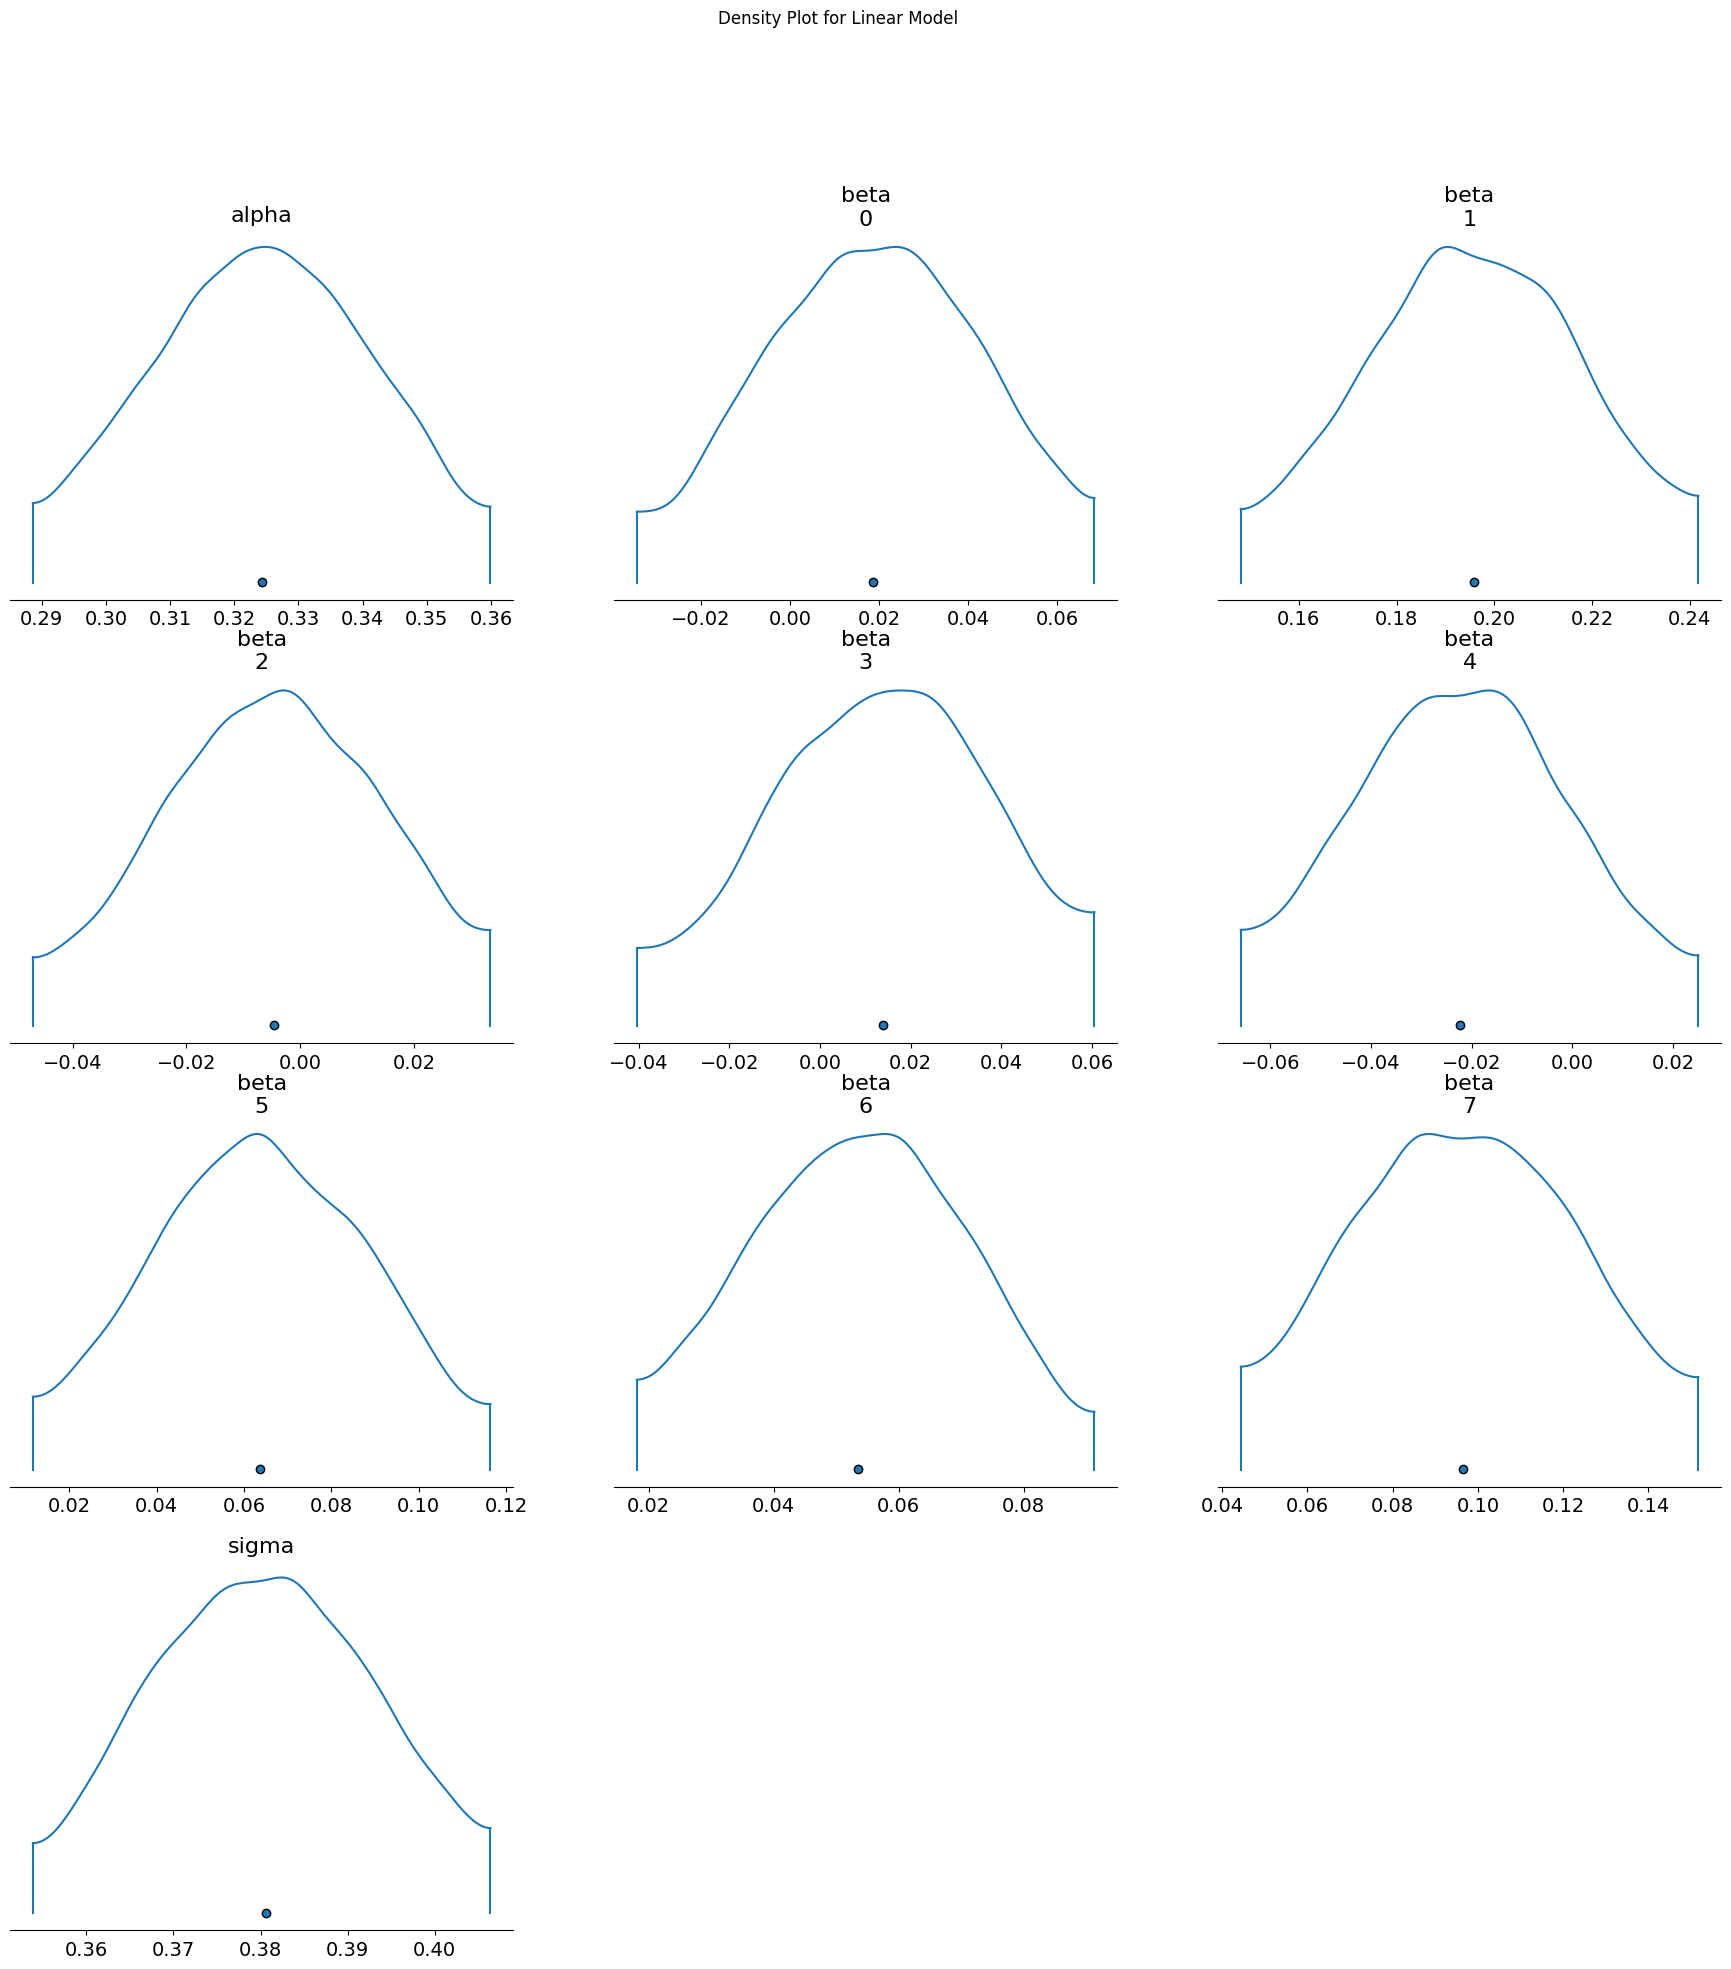

<Figure size 1000x700 with 0 Axes>

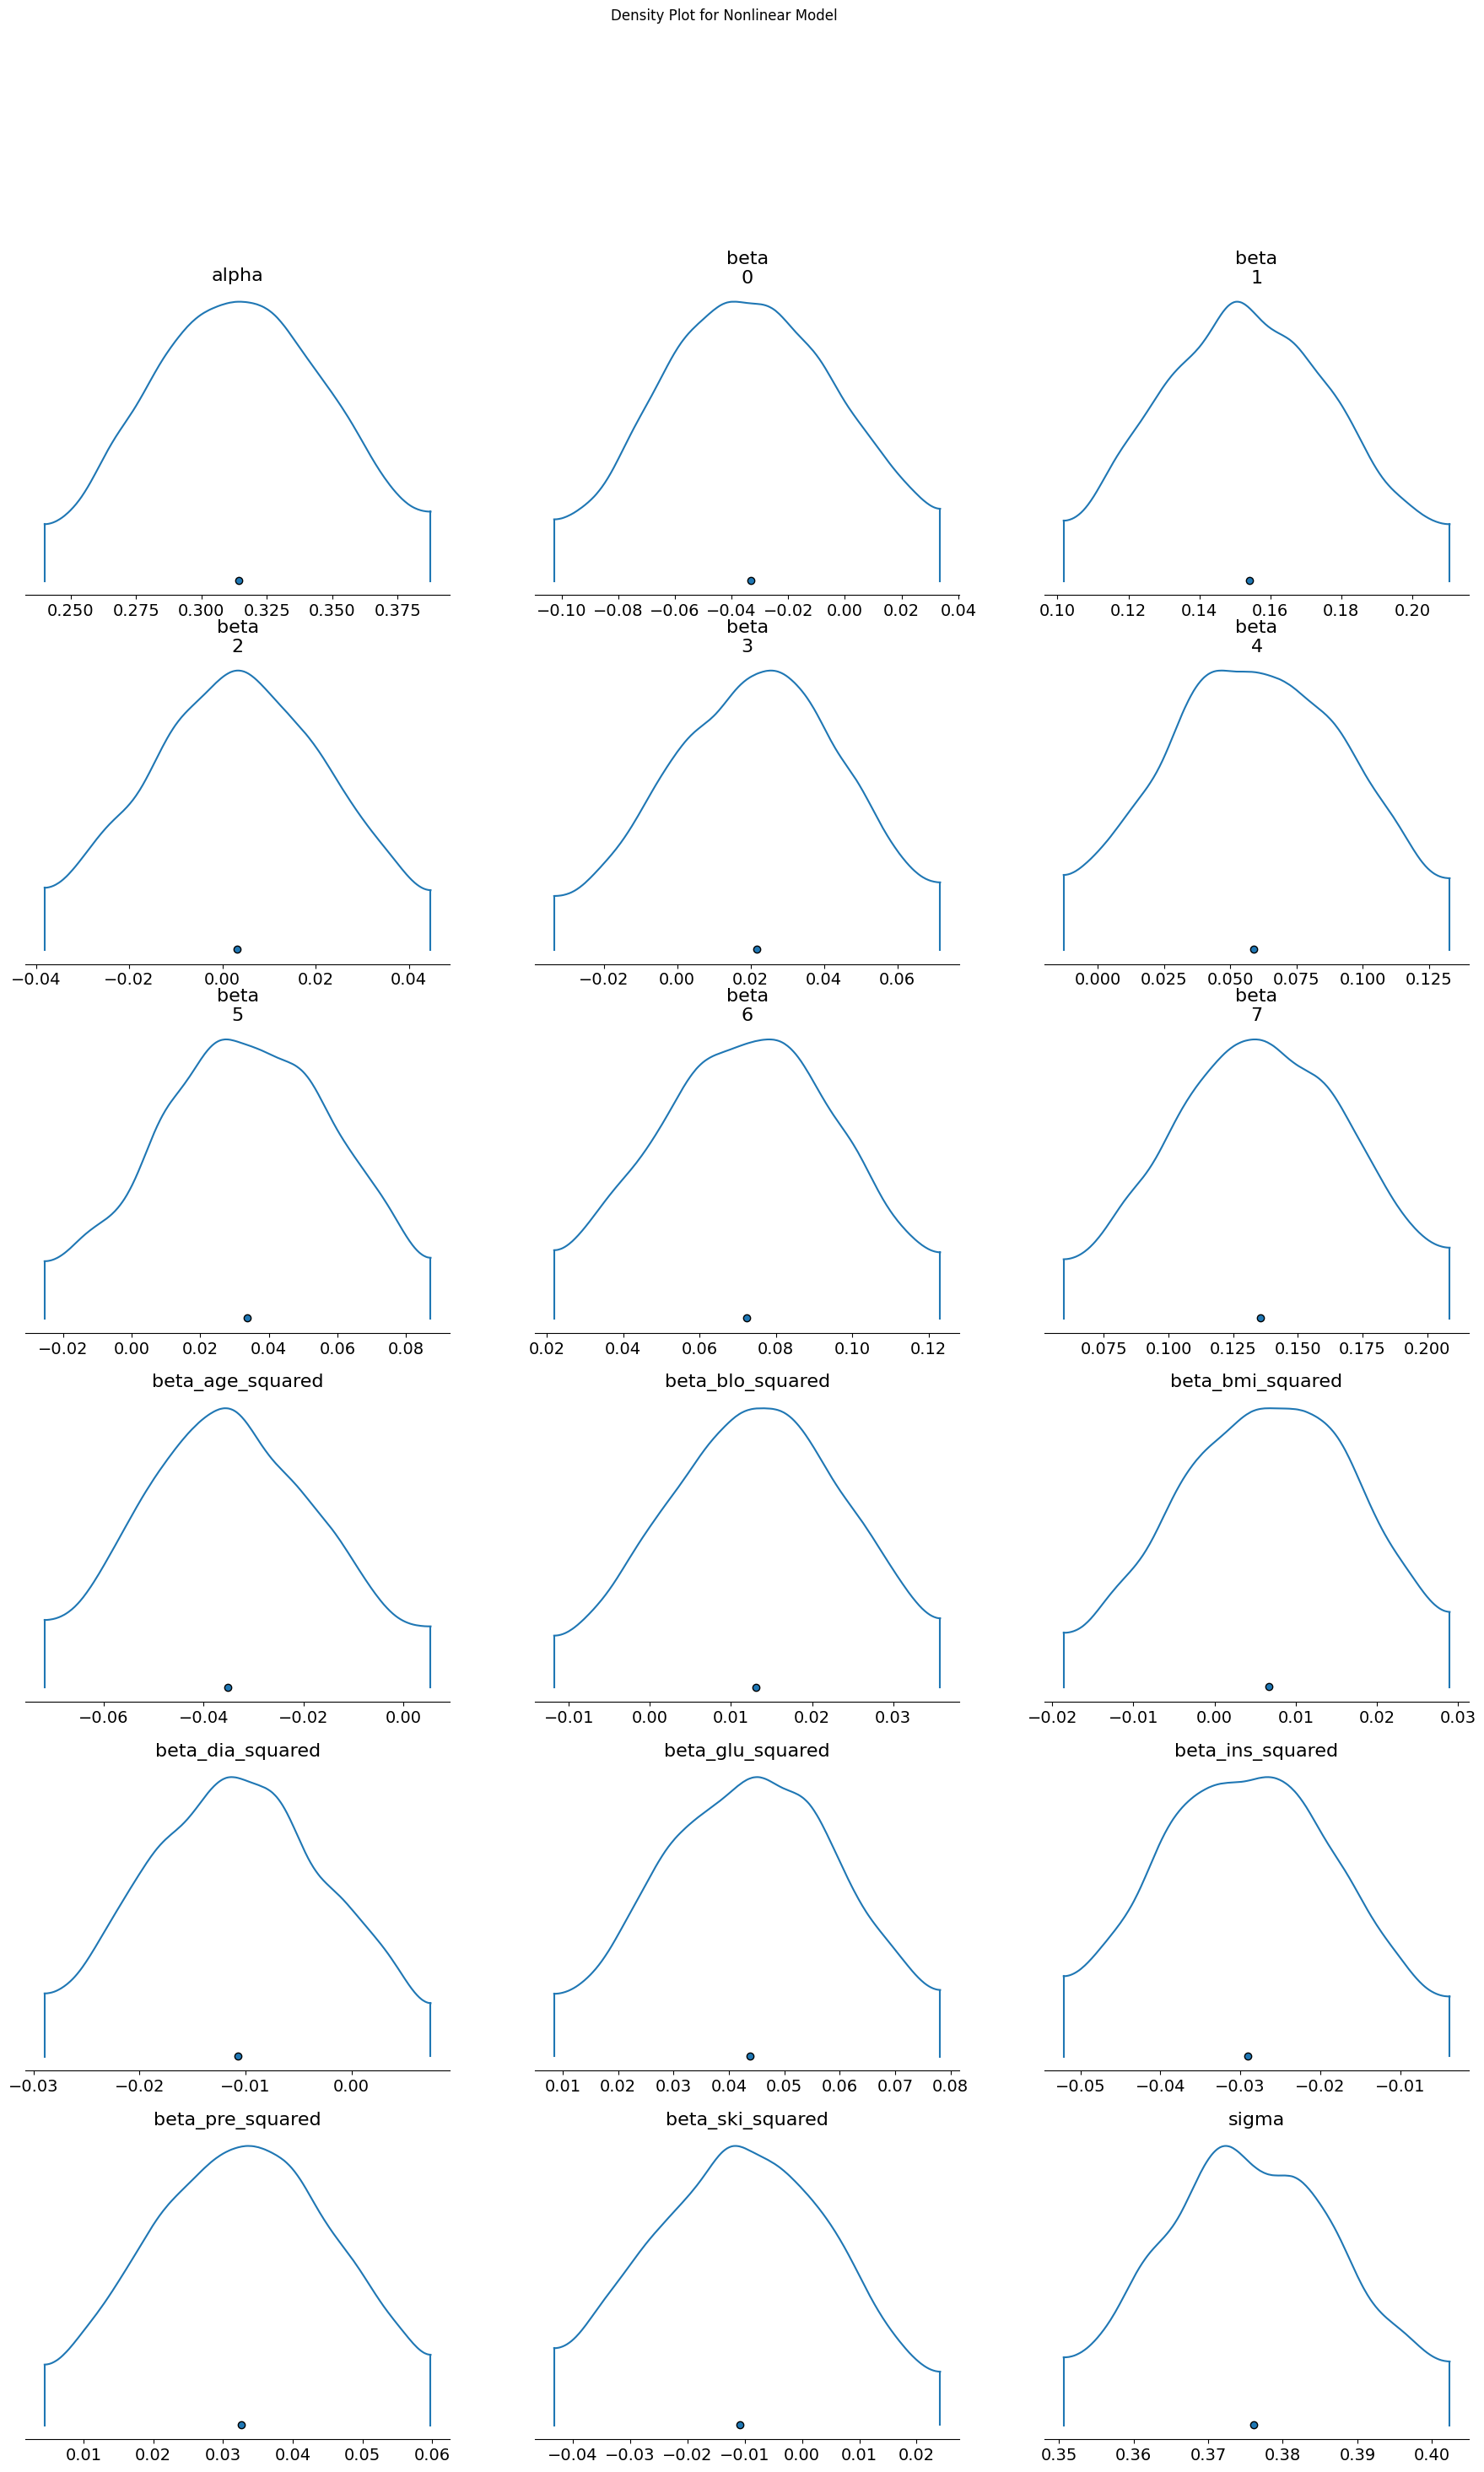

In [176]:
# Density Plots of Model Parameters
# Density plot for the linear model
plt.figure(figsize=(10, 7))  # Set figure size for better visualization
az.plot_density(linear_inference)
plt.suptitle('Density Plot for Linear Model')  # Set title for the figure
plt.show()  # Display the plot

# Density plot for the nonlinear model
plt.figure(figsize=(10, 7))  # Adjust size as needed
az.plot_density(nonlinear_inference)
plt.suptitle('Density Plot for Nonlinear Model')  # Set title for the figure
plt.show()


In [189]:
# Calculate WAIC for each model
waic_linear = az.waic(linear_inference, scale='deviance')
waic_nonlinear = az.waic(nonlinear_inference, scale='deviance')

# Calculate LOO-CV for each model
loo_linear = az.loo(linear_inference, scale='deviance')
loo_nonlinear = az.loo(nonlinear_inference, scale='deviance')

# Print WAIC and LOO-CV results using the .elpd_waic and .elpd_loo keys
print("Linear Model WAIC:", waic_linear.elpd_waic)
print("Non-Linear Model WAIC:", waic_nonlinear.elpd_waic)
print("Linear Model LOO-CV:", loo_linear.elpd_loo)
print("Non-Linear Model LOO-CV:", loo_nonlinear.elpd_loo)




Linear Model WAIC: -189.56507599836607
Non-Linear Model WAIC: -189.73581302661455
Linear Model LOO-CV: -189.4204051091431
Non-Linear Model LOO-CV: -189.5819901275775


In [190]:
# Compare models using WAIC
comparison = az.compare({
    'Linear': linear_inference,
    'Non-linear': nonlinear_inference
}, ic='waic')
# Print comparison results
print(comparison)


            rank  elpd_waic     p_waic  elpd_diff    weight        se  \
Non-linear     0  94.867907  56.028768   0.000000  0.535098  5.636502   
Linear         1  94.782538  56.222518   0.085369  0.464902  5.440231   

                 dse  warning scale  
Non-linear  0.000000    False   log  
Linear      1.610293    False   log  


In [191]:
# Compare models using LOO-CV
comparison_loo = az.compare({
    'Linear': linear_inference,
    'Non-linear': nonlinear_inference
}, ic='loo')

# Print comparison results
print(comparison_loo)


            rank   elpd_loo      p_loo  elpd_diff    weight        se  \
Non-linear     0  94.790995  56.105680   0.000000  0.533297  5.636827   
Linear         1  94.710203  56.294853   0.080793  0.466703  5.440305   

                 dse  warning scale  
Non-linear  0.000000    False   log  
Linear      1.610676    False   log  


In [192]:

# Convert WAIC comparison to DataFrame
comparison_waic_df = pd.DataFrame(comparison)

# Convert LOO-CV comparison to DataFrame
comparison_loo_df = pd.DataFrame(comparison_loo)

# Combine both WAIC and LOO-CV results for a single table
combined_comparison = pd.concat([comparison_waic_df.add_suffix(' (WAIC)'),
                                  comparison_loo_df.add_suffix(' (LOO-CV)')], axis=1)

# Transpose the table
transposed_comparison = combined_comparison.T

# Display the transposed comparison table
from IPython.display import display
display(transposed_comparison)

,Non-linear,Linear
rank (WAIC),0,1
elpd_waic (WAIC),94.867907,94.782538
p_waic (WAIC),56.028768,56.222518
elpd_diff (WAIC),0.0,0.085369
weight (WAIC),0.535098,0.464902
se (WAIC),5.636502,5.440231
dse (WAIC),0.0,1.610293
warning (WAIC),False,False
scale (WAIC),log,log
rank (LOO-CV),0,1


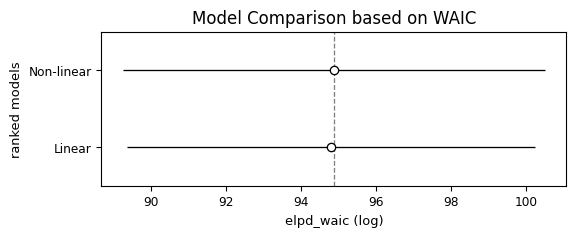

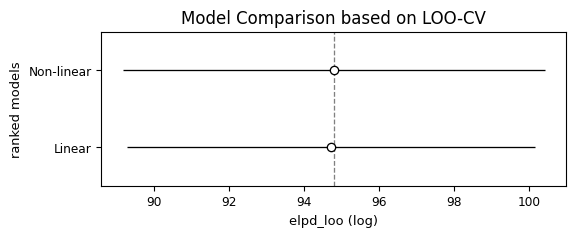

In [193]:
# Model Comparison Plots
az.plot_compare(comparison)
plt.title('Model Comparison based on WAIC')
plt.show()

az.plot_compare(comparison_loo)
plt.title('Model Comparison based on LOO-CV')
plt.show()
